In [91]:
from pylab import *
#import random
p=0.45
p_1 = p # Wahrscheinlichkeit der Übertragung an Nachbarn
p_2 = p # Wahrscheinlichkeit krank zu bleiben
t_N = 100000
i_M = 100
A = np.zeros((t_N, i_M)) #erhalte nxm-Matrix mit 0-en
print (A)

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [92]:
A[0][50] = 1 #eine beliebige Zahl der 1.Zeile wird 1 -> r0 = 0.01???

In [93]:
for i in range(t_N-1):
    for j in range(i_M):
        if A[i,j] == 1:
            if np.random.rand() < p_1: # Übertragung an Nachbarn
                A[i+1][(j+1)%i_M] = 1
            if np.random.rand() < p_2: # krank bleiben
                A[i+1][j] = 1
            if np.random.rand() < p_1: # Übertragung an Nachbarn
                A[i+1][(j-1)%i_M] = 1
                
            

In [94]:
%matplotlib inline

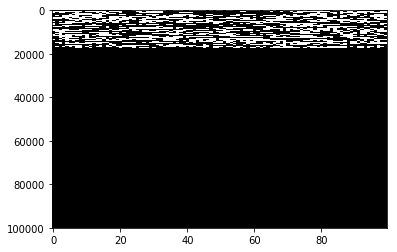

In [95]:
imshow(A,interpolation='none',aspect="auto", cmap='gray')
show()

In [96]:
A.shape

(100000, 100)

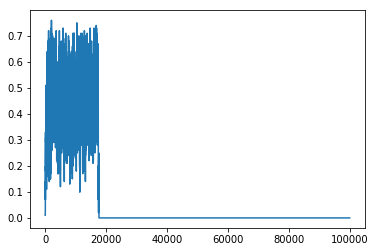

In [97]:
plot(sum(A,axis=1)/i_M)
show()

In [98]:
Tohm = False
for y in range(t_N-1): #definiere Tohm als erste Nullzeile, also als Zeitpunkt, wenn die Krankheit verschwindet
    anzahl_einsen = 0
    for x in range(i_M):
        if A[y][x] == 1:
            anzahl_einsen = anzahl_einsen + 1
        if x == (i_M-1):
            if anzahl_einsen == 0:
                if Tohm == False:
                    Tohm = y 
                                    

    if (y == t_N - 2 and Tohm == False):
        Tohm = t_N + 1
            
print(Tohm)

17612


In [118]:
r_final = sum(A[Tohm-1][:]) #r_final ist die Anzahl der infizierten Personen zum Zeitpunkt Tohm-1 (also zum Zeitpunkt bevor die Infektion verschwindet)
print(r_final)#es funktioniert jedoch nur manchmal

1.0


In [99]:
r = sum(A, axis = 1) #r definiert als Anzahl der Einsen pro Zeile, bzw. Anzahl der Erkrankten pro Zeitschritt
print(r)

[ 1.  1.  2. ...,  0.  0.  0.]


Text(0,0.5,'r')

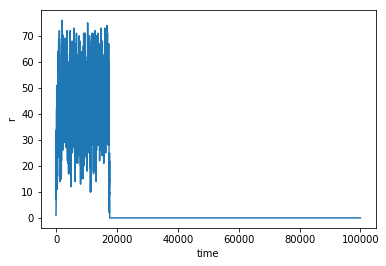

In [100]:
plot(r)#das ist das Diagamm t-r (Anzahl der Erkrankten pro Zeitschritt)
xlabel('time')
ylabel('r')

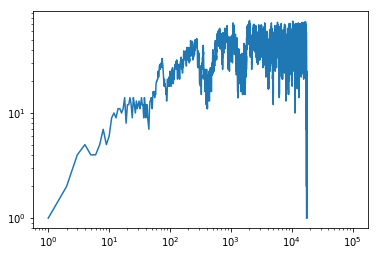

In [101]:
loglog(r)#plotte r doppelt logarythmisch

p_cr ist der Wert wenn de Infetion weder gegen 0 geht, noch immer durchläuft.
Wenn p > p_cr, dann geht r gegen einen Wert =! 0 der saturiert.
Wenn p < p_cr, dann geht r gegen 0.
Bei p_cr soll gelten r(t) ~ t^-delta. 
Der Wert p_cr müsste bei ungefähr p = 0,45 liegen. Da man bei p = 0,47 eine durchgehende Infektion beobachten kann, die bei einem Wert r saturiert und man bei p = 0,43 eine schnell aussterbende Infektion beobachten kann, bei der r exponentiell gegen Null geht. 

In [86]:
k = list(range(1,100001))#versuche delta herauszufinden um dann t^-delta plotten zu können
m = sum(A[:][:Tohm])
t = np.array(k) #t als Zeit array definiert
#r = t^-d --> log(r) = -d * log(t) --> -(log(r)/log(t)) = d

delta = -(log(m)/log(t))
print(delta) #es kommen keine korrekten Werte heraus, z.B. -inf

[        -inf -18.30605279 -11.54983337 ...,  -1.10213611  -1.10213516
  -1.1021342 ]


C:\Users\Lea\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  


In [111]:
f = 2^t

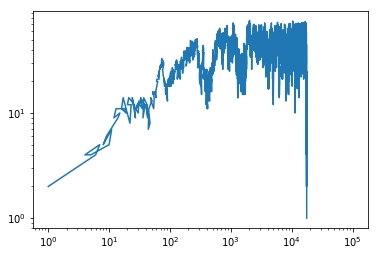

In [113]:
loglog(f,r)#kein großer unterschied es nach t[l]=2^l zu plotten oder hab ich das falsch gemacht????